<a href="https://colab.research.google.com/github/Stella-kimani/.Stl_Week_14_R/blob/master/IP__Stella__of_Part_1%262_supermarket_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Business Understanding

Problem Statement: 

Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest number of sales. As  a data analyst i wil divide this project into four parts, explore a recent marketing dataset by performing various unsupervised learning techniques and later providing recommendations based on my findings.

#1.2.Metrics for Success
The analysis will be successful when:

1.We are able to  perform  unsupervised learning techniques, that is dimension reduction strategies,feature selection, association rules and anomaly detecttion techniques and state insights drawn from the analysis.


2.My findings/insights gotten from analysis help inform Carrefour Kenya team in formulating the marketing and sales strategies of their company.

#1.3.Understanding the context.

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. 



#1.4.Recording the experimental design

The following are the steps that we will take to conduct this project. They are listed below:

1.Problem definition

2.Data sourcing

3.Loading and checking the data

4.Perform necessary data preparation and EDA

5.Part 1: Apply dimension reduction techniques.

6.Part 2: Apply feature Selection techniques.

7.Part 3: Create association rules to identify relationships.This is done in a different notebook.

8.Part 4 : Perform anomaly detection to detect fraud.This is done in a different notebook.





#2.Data sourcing

This dataset is valid and comtains accurate information.It can be found here.
https://www.kaggle.com/aungpyaeap/supermarket-sales

In [4]:
install.packages("data.table")
require(data.table)
library(data.table)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



#3.Loading  and checking the dataset

In [5]:
# loading dataset
df <- read.csv("/content/Supermarket_Dataset_1 - Sales Data.csv")
head(df)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [5]:
# getting the shape of our dataset
dim(df)


[1] 1000   16

There are 1000 rows in the dataset and 16 columns.

In [9]:
# getting information about the dataset
str(df)

'data.frame':	1000 obs. of  16 variables:
 $ Invoice.ID             : Factor w/ 1000 levels "101-17-6199",..: 815 143 654 19 340 734 316 265 703 727 ...
 $ Branch                 : Factor w/ 3 levels "A","B","C": 1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type          : Factor w/ 2 levels "Member","Normal": 1 2 2 1 2 2 1 2 1 1 ...
 $ Gender                 : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line           : Factor w/ 6 levels "Electronic accessories",..: 4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : Factor w/ 89 levels "1/1/2019","1/10/2019",..: 27 88 82 20 58 77 49 48 2 44 ...
 $ Time                   : Factor w/ 506 levels "10:00","10:01",..: 147 24 156 486 30 394 215 78 342 160 ...
 $ Payment                : Factor w/ 3 levels "Cash","Credit card",..: 3 1 2 3 3

This gives more information on the datatypes of the columns.Invoice.ID , Branch,Customer.type, gender and product line, date, time and payment are all factor datatypes.

In [10]:
#Checking the summary of the dataset
summary(df)

       Invoice.ID  Branch  Customer.type    Gender   
 101-17-6199:  1   A:340   Member:501    Female:501  
 101-81-4070:  1   B:332   Normal:499    Male  :499  
 102-06-2002:  1   C:328                             
 102-77-2261:  1                                     
 105-10-6182:  1                                     
 105-31-1824:  1                                     
 (Other)    :994                                     
                 Product.line   Unit.price       Quantity          Tax         
 Electronic accessories:170   Min.   :10.08   Min.   : 1.00   Min.   : 0.5085  
 Fashion accessories   :178   1st Qu.:32.88   1st Qu.: 3.00   1st Qu.: 5.9249  
 Food and beverages    :174   Median :55.23   Median : 5.00   Median :12.0880  
 Health and beauty     :152   Mean   :55.67   Mean   : 5.51   Mean   :15.3794  
 Home and lifestyle    :160   3rd Qu.:77.94   3rd Qu.: 8.00   3rd Qu.:22.4453  
 Sports and travel     :166   Max.   :99.96   Max.   :10.00   Max.   :49.6500  
        

This gives a statistical summary of the dataset.

In [15]:
# check for missing values
colSums(is.na(df))

Branch           Customer.type                  Gender 
                      0                       0                       0 
           Product.line              Unit.price                Quantity 
                      0                       0                       0 
                    Tax                    Date                    Time 
                      0                       0                       0 
                Payment                    cogs gross.margin.percentage 
                      0                       0                       0 
           gross.income                  Rating                   Total 
                      0                       0                       0 
                    Day                   Month                    Year 
                      0                       0                       0 
                   Hour                  Minute 
                      0                       0

There are no missing values in the dataset.

In [16]:
#checking for duplicates 

duplicated_<-df[duplicated(df),]
duplicated_


Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total,Day,Month,Year,Hour,Minute
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>


There are no duplicates in the dataset.

In [22]:
# dropping the "Invoice.ID" column since i will not use it.
df$Invoice.ID <- NULL

In [4]:
#Lets get the names of the columns
names(df)

[1] "Invoice.ID"              "Branch"                 
 [3] "Customer.type"           "Gender"                 
 [5] "Product.line"            "Unit.price"             
 [7] "Quantity"                "Tax"                    
 [9] "Date"                    "Time"                   
[11] "Payment"                 "cogs"                   
[13] "gross.margin.percentage" "gross.income"           
[15] "Rating"                  "Total"

This is a description of the columns.

1.Invoice id: Computer generated sales slip invoice identification number

2.Branch: Branch of supercenter (3 branches are available identified by A, B and C).

3.Customer type: Type of customers, recorded by members for customers using member card and normal for without member card.

4.Gender: Gender type of customer

5.Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

6.Unit price: Price of each product in $

7.Quantity: Number of products purchased by customer

8.Tax: 5% tax fee for customer buying

9.Total: Total price including tax

10.Date: Date of purchase (Record available from January 2019 to March 2019)

11.Time: Purchase time (10am to 9pm)

12.Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

13.COGS: Cost of goods sold

14.Gross margin percentage: Gross margin percentage

15.Gross income: Gross income

16.Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

#4.Performing exploratory data analysis and data cleaning.

In [6]:
#Describing the data
install.packages("psych")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [12]:
#Univariate summary of the dataset.
library(psych)
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Branch*,1,1000,1.988000,0.8176335,2.000000,1.985000,1.48260,1.000000,3.000000,2.0000,0.022035066,-1.50533975,0.02585584
Customer.type*,2,1000,1.499000,0.5002492,1.000000,1.498750,0.00000,1.000000,2.000000,1.0000,0.003994009,-2.00198303,0.01581927
Gender*,3,1000,1.499000,0.5002492,1.000000,1.498750,0.00000,1.000000,2.000000,1.0000,0.003994009,-2.00198303,0.01581927
Product.line*,4,1000,3.452000,1.7154121,3.000000,3.440000,1.48260,1.000000,6.000000,5.0000,0.058921626,-1.28239376,0.05424609
Unit.price,5,1000,55.672130,26.4946283,55.230000,55.617800,33.36591,10.080000,99.960000,89.8800,0.007056230,-1.22206222,0.83783371
Quantity,6,1000,5.510000,2.9234306,5.000000,5.512500,2.96520,1.000000,10.000000,9.0000,0.012902251,-1.21903927,0.09244699
Tax,7,1000,15.379369,11.7088255,12.088000,13.995553,11.13247,0.508500,49.650000,49.1415,0.889893881,-0.09329206,0.37026557
Date*,8,1000,45.582000,25.8947449,47.000000,45.628750,34.09980,1.000000,89.000000,88.0000,-0.025312281,-1.23250638,0.81886373
Time*,9,1000,252.176000,147.0669225,249.000000,252.488750,190.51410,1.000000,506.000000,505.0000,0.002703762,-1.24794946,4.65066444


Here we see each column and the statistical univariate summaries.We can tell that all columns have negative kurtosis.We can also tell that we have  of uneven scales this means that while doing dimension reduction i will have to transform/normalize the data.

In [16]:
#Aggregate total sales by product line
aggregate(df$Total, by=list(Category=df$Product.line), FUN=sum)

Category,x
<fct>,<dbl>
Electronic accessories,54337.53
Fashion accessories,54305.89
Food and beverages,56144.84
Health and beauty,49193.74
Home and lifestyle,53861.91
Sports and travel,55122.83


The food and beverages product line has the highest totals followed by sports and travel product line.

In [14]:
#Aggregate total sales by customer type
aggregate(df$Total, by=list(Category=df$Customer.type), FUN=sum)

Category,x
<fct>,<dbl>
Member,164223.4
Normal,158743.3


Members total(total price including tax) is higher than  normal customers (without member card).

In [17]:
#Aggregate total sales by methods of payment
aggregate(df$Total, by=list(Category=df$Payment), FUN=sum)

Category,x
<fct>,<dbl>
Cash,112206.6
Credit card,100767.1
Ewallet,109993.1


Most customers will opt for cash as compared to other payment methods like Ewallet and credit card which is least popular payment method.

In [18]:
#Aggregate total sales by branch
aggregate(df$Total, by=list(Category=df$Branch), FUN=sum)

Category,x
<fct>,<dbl>
A,106200.4
B,106197.7
C,110568.7


Branch C has a higher total when compared to branch A and B.

In [19]:
#Aggregate total sales by gender
aggregate(df$Total, by=list(Category=df$Gender), FUN=sum)

Category,x
<fct>,<dbl>
Female,167882.9
Male,155083.8


Females have a higher total than males.It is therefore accurate to say females shopped more in this study.

In [5]:
#splitting date into Day, Month, and Year columns, changing them to factors
df$Day <- as.factor(format(as.POSIXct(df$Date, format="%m/%d/%Y"), "%d"))
df$Month <- as.factor(format(as.POSIXct(df$Date, format="%m/%d/%Y"), "%m"))
df$Year <- as.factor(format(as.POSIXct(df$Date, format="%m/%d/%Y"), "%Y"))

# splitting time  into hour and minute, then into factors
df$Hour <- as.factor(format(as.POSIXct(df$Time, format="%H:%M"), "%H"))
df$Minute <- as.factor(format(as.POSIXct(df$Time, format="%H:%M"), "%M"))

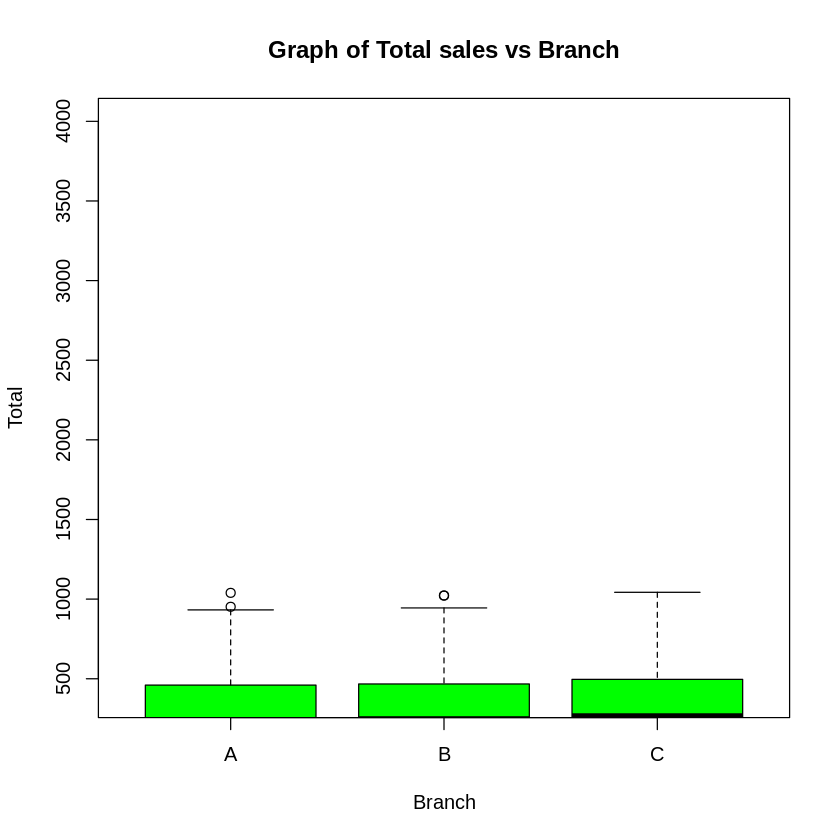

In [24]:
boxplot(Total~Branch, data = df, main = "Graph of Total sales vs Branch", xlab = "Branch", ylab = "Total",col = "green", ylim = c(400, 4000))

Branch C is just slightly higher in terms of totals as compared to the other branches.

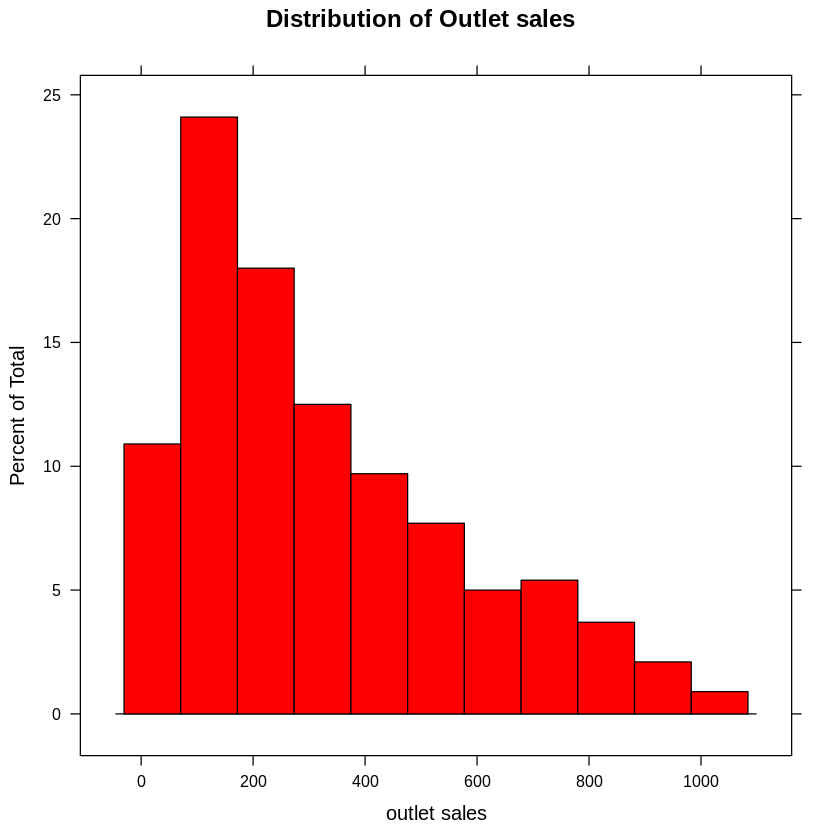

In [25]:
library(lattice)
histogram(~Total, data = df,
main = "Distribution of Outlet sales", xlab="outlet sales", col='red' )

We observe that the plot shows that the total column is positively skewed.The skewness of this column is 0.889893881.This may be due to presence outliers.

In [29]:
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’




In [6]:
install.packages("plyr")
library(plyr)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [9]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ stringr 1.4.0
✔ tidyr   1.1.2     ✔ forcats 0.5.0
✔ readr   1.3.1     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()         masks plyr::arrange()
✖ lubridate::as.difftime() masks base::as.difftime()
✖ dplyr::between()         masks data.table::between()
✖ purrr::compact()         masks plyr::compact()
✖ dplyr::count()           masks plyr::count()
✖ lubridate::date()        masks base::date()
✖ dplyr::failwith()        masks plyr::failwith()
✖ dplyr::filter()          masks stats::filter()
✖ dplyr::first()           masks data.table::first()
✖ lubridate::hour()        masks data.table::hour()
✖ dplyr::id()              masks plyr::id()
✖ lubridate::intersect()   masks base::intersect()
✖ lubridate::isoweek()     masks data.table::isoweek()
✖ dplyr::lag()             masks stats::lag()
✖ dplyr:


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




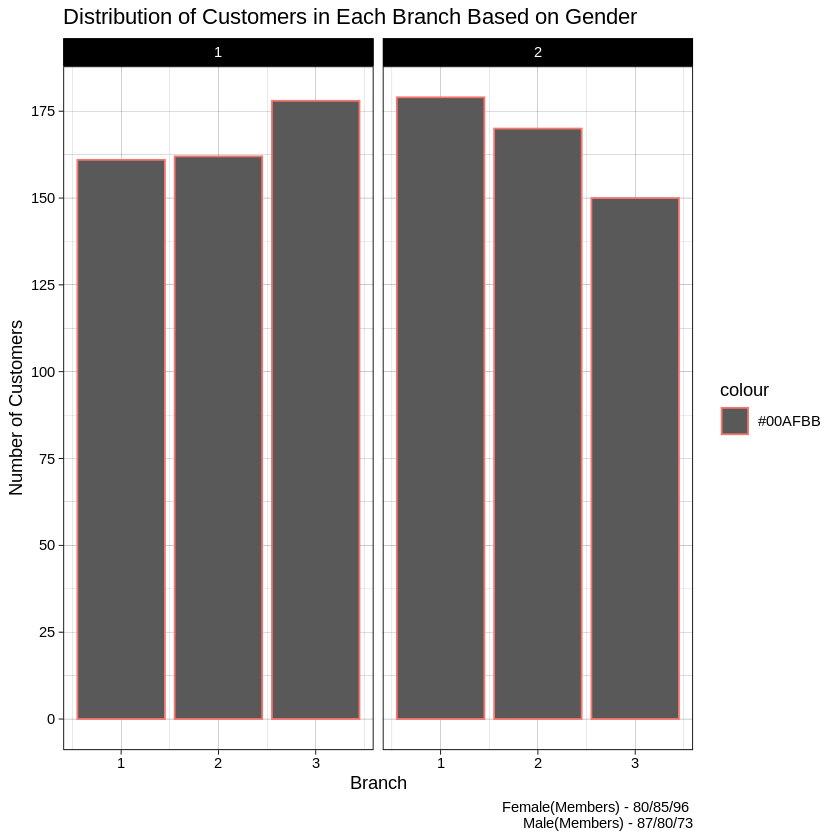

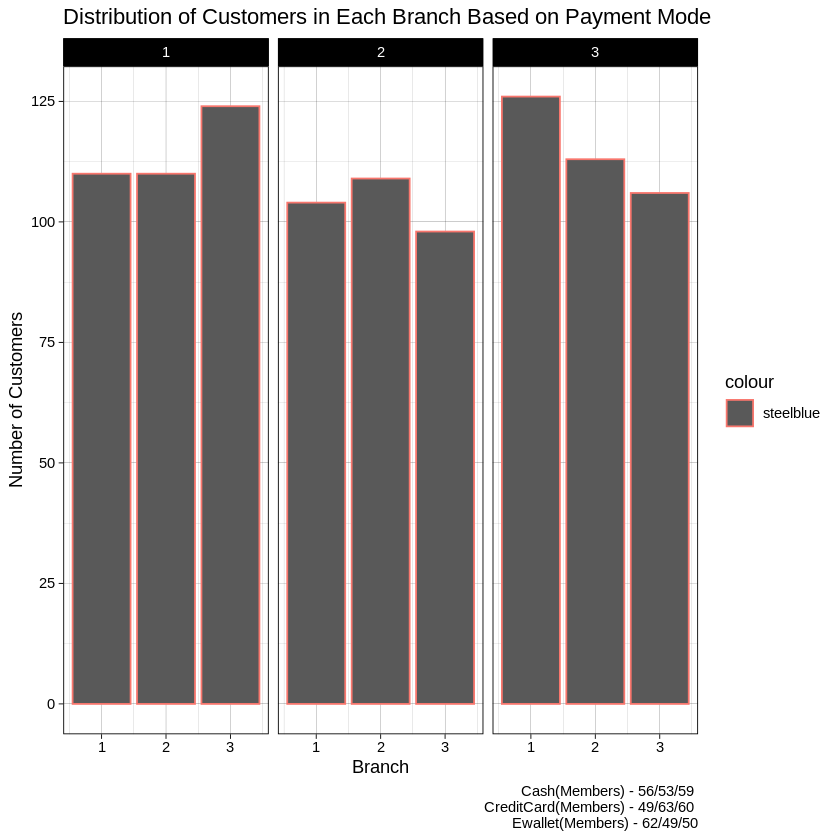

In [22]:
library(ggplot2)
library(gridExtra)
#Plot showing branch vs 
p <- ggplot(data = df, mapping = aes(x = Branch)) + geom_bar(mapping = aes(fill = Customer.type, color = "#00AFBB")) + 
theme_linedraw() + ggtitle("Distribution of Customers in Each Branch Based on Gender") + xlab("Branch") + ylab("Number of Customers") 
p + facet_wrap(df$Gender) + scale_y_continuous(breaks = c(0, 25, 50, 75, 100, 125, 150, 175)) + labs(caption = "Female(Members) - 80/85/96 \n Male(Members) - 87/80/73")

g <- ggplot(data = df, mapping = aes(x = Branch)) + geom_bar(mapping = aes(fill = Customer.type, color ="steelblue")) + 
theme_linedraw() + ggtitle("Distribution of Customers in Each Branch Based on Payment Mode")+ xlab("Branch") + ylab("Number of Customers") 
g + facet_wrap(df$Payment) + scale_y_continuous(breaks = c(0, 25, 50, 75, 100, 125, 150, 175)) + labs(caption = "Cash(Members) - 56/53/59 \n CreditCard(Members) - 49/63/60 \n Ewallet(Members) - 62/49/50")

In [ ]:
#Lets  analyze the branch and product lines deeper.
df$Date <- gsub('/', '-', df$Date)

r2 <- df %>% 
  mutate(DATE=mdy(Date))%>%
  select(everything())

dfA<- filter(r2, Branch=='A')
dfB<- filter(r2, Branch=='B')
dfC<- filter(r2, Branch=='C')

dfAsum <- group_by(dfA, DATE, Product.line) %>% select(everything())
dfAsum<- summarise(dfAsum, daytotal=sum(Total)) %>% select(everything())

dfBsum <- group_by(dfB, DATE, Product.line) %>% select(everything())
dfBsum<- summarise(dfBsum, daytotal=sum(Total)) %>% select(everything())

dfCsum <- group_by(dfC, DATE, Product.line) %>% select(everything())
dfCsum<- summarise(dfCsum, daytotal=sum(Total)) %>% select(everything())

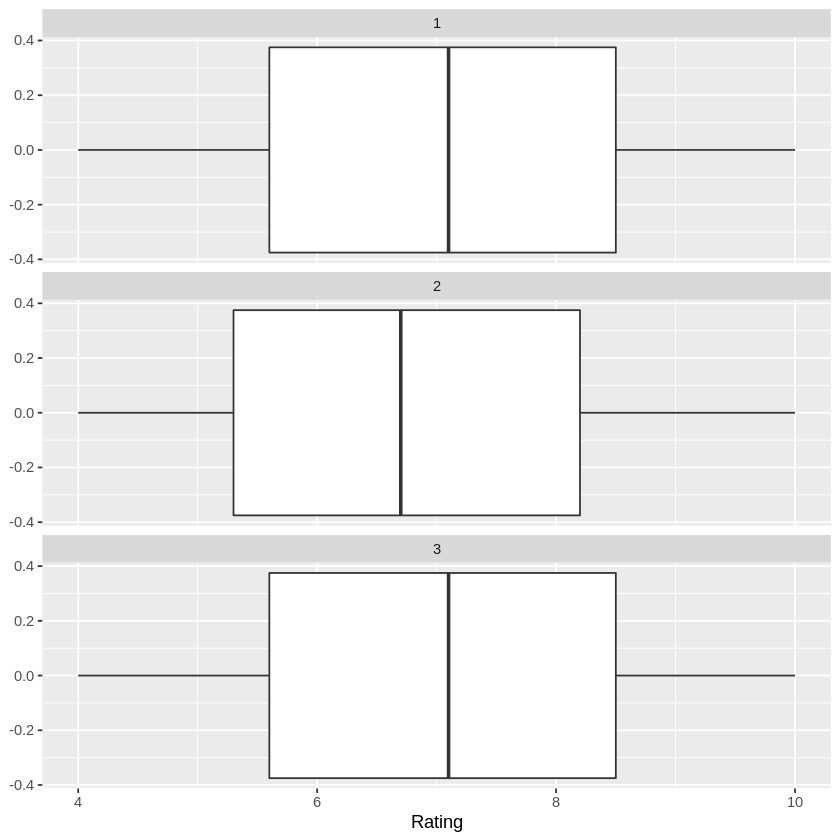

In [ ]:
ggplot (data=df)+
  geom_boxplot(mapping=aes(x=Rating, fill=Product.line), position="dodge")+
    facet_wrap(~Branch, nrow=3)

This graph could be used to fine tune the strategy to increase customer satisfaction. We can see that the rating distrubution for product lines in each branch vary significantly. Perhaps the most interesting observation is in branch B. The ratings for nearly every category are either similar or less than the ratings of the other stores. However, it appears that the food and beverage category has a significantly better average rating than the other categories as well as the other stores. This would be a key insight for further analysis in determining a course of action for customer satisfaction improvement.

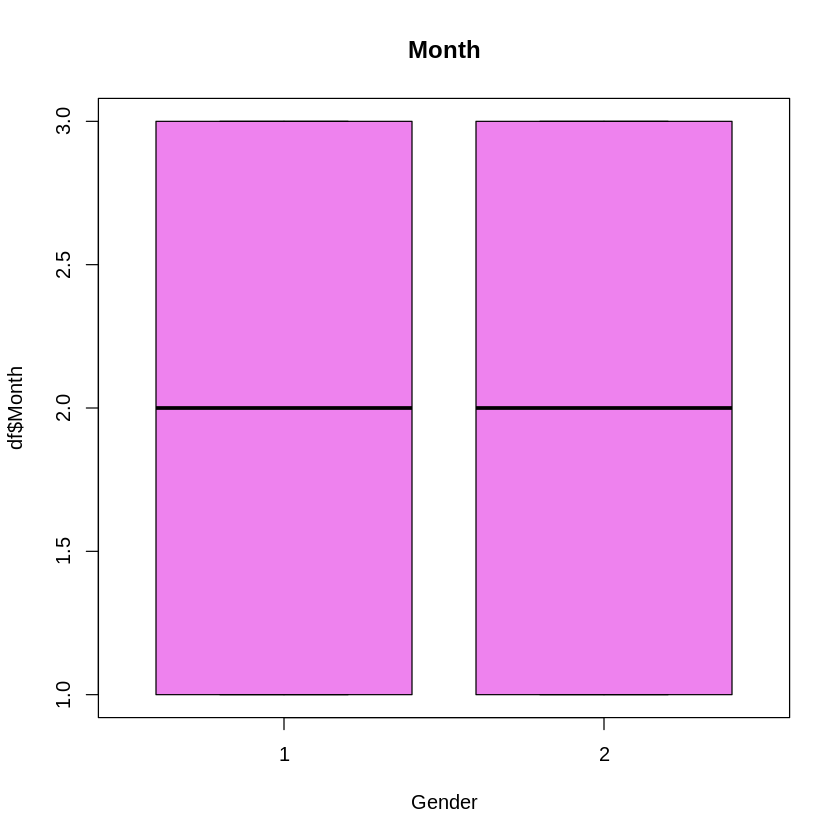

In [ ]:
#A boxplot for Month and weekend.
boxplot(df$Month~Gender, data = df, main="Month",col= "violet")

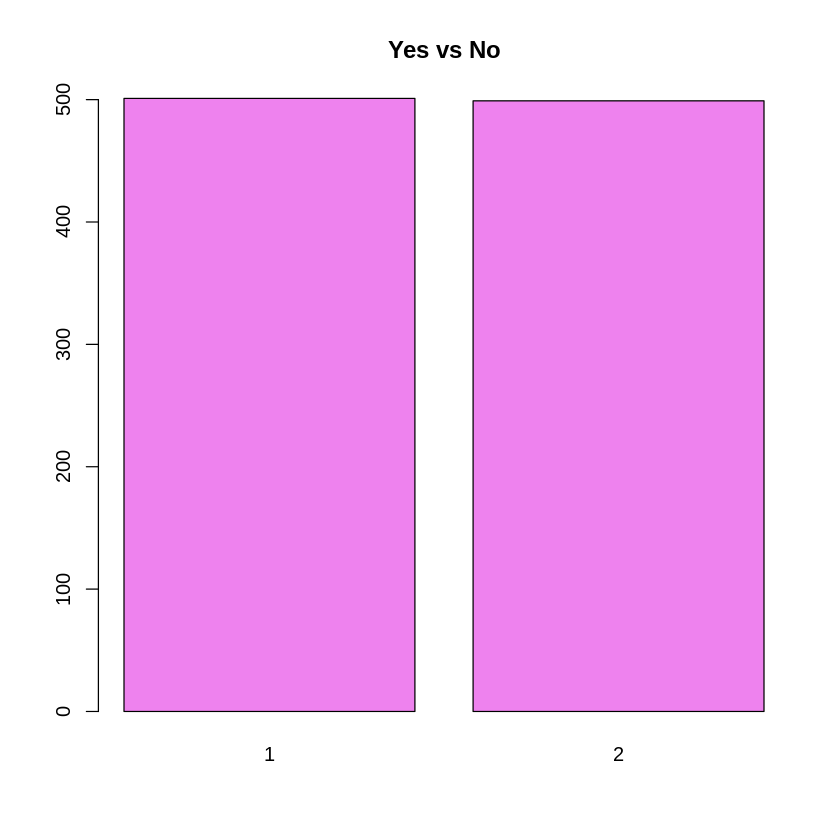

In [ ]:
#Barplot of gender column
Gender <- df$Gender
Gender_f <- table(Gender)
barplot(Gender_f, col = "violet")
title("Yes vs No")


There are an equal number of males and females 

In [23]:
df$gross.margin.percentage <- NULL
df$Year <- NULL

In [24]:
# dropping "Date" and "Time" since the columns are irrelevant.
df$Date <- NULL
df$Time <- NULL

In [13]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’




In [14]:
install.packages("lattice")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [15]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



corrplot 0.84 loaded



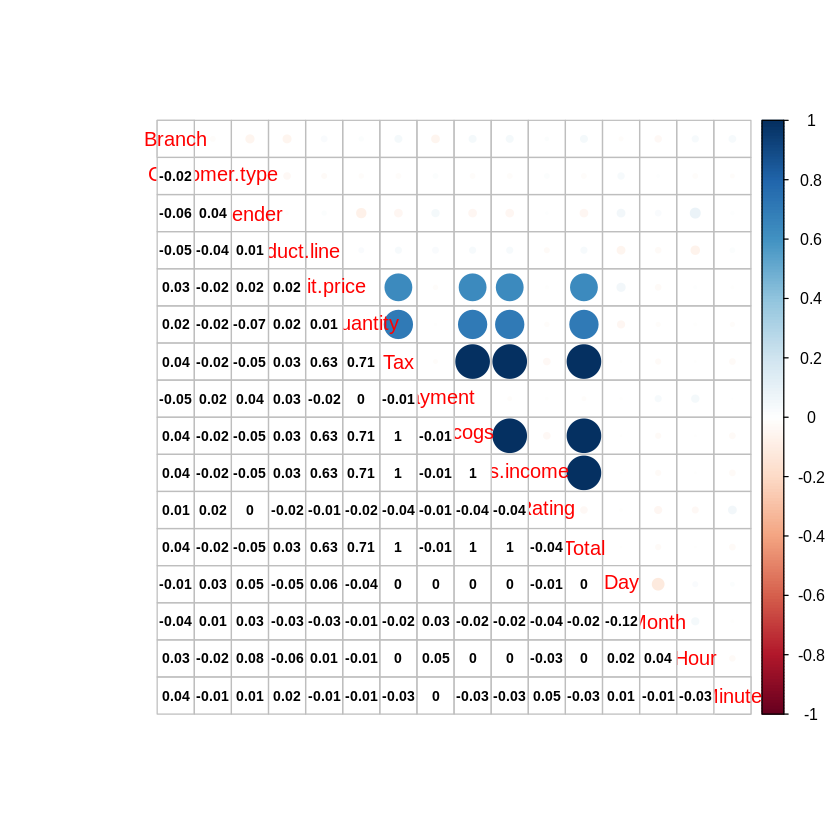

In [29]:
library(corrplot)
cor1 = cor(df)
corrplot.mixed(cor1, lower.col = "black", number.cex = .7)

Unit price and cogs have high correlation.Quantity and tax have high correlation.Cogs and payment type have very low correlation.

#5.Perform dimension reduction techniques

In [18]:
#Let me normalize the variables since i have variable with unequal scales.
normalize <- function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}

In [32]:
str(df)

'data.frame':	1000 obs. of  16 variables:
 $ Branch       : num  1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type: num  1 2 2 1 2 2 1 2 1 1 ...
 $ Gender       : num  1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line : num  4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price   : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity     : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax          : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Payment      : num  3 1 2 3 3 3 3 3 2 2 ...
 $ cogs         : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.income : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Rating       : num  9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...
 $ Total        : num  549 80.2 340.5 489 634.4 ...
 $ Day          : num  5 8 3 27 8 25 25 24 10 20 ...
 $ Month        : num  1 3 3 1 2 3 2 2 1 2 ...
 $ Hour         : num  4 1 4 11 1 9 5 2 8 4 ...
 $ Minute       : num  9 30 24 34 38 31 37 39 16 28 ...


In [21]:
## Creating a copy  data.
df_normalized <- df

In [26]:
## Normalizing numerical variables.
df_normalized$Branch   <- normalize(df$Branch)
df_normalized$Customer.type <- normalize(df$Customer.type)
df_normalized$Gender <- normalize(df$Gender)
df_normalized$Product.line <- normalize(df$Product.line)
df_normalized$Unit.price <- normalize(df$Unit.price)
df_normalized$Quantity  <- normalize(df$Quantity)
df_normalized$Tax <- normalize(df$Tax)
df_normalized$Payment  <- normalize(df$Payment)
df_normalized$cogs <- normalize(df$cogs)
df_normalized$ gross.income <- normalize(df$gross.income)
df_normalized$Rating  <- normalize(df$Rating)
df_normalized$Total <- normalize(df$Total)
df_normalized$Day <- normalize(df$Day)
df_normalized$Month  <- normalize(df$Month)
df_normalized$Hour <- normalize(df$Hour)
df_normalized$Minute <- normalize(df$Minute)

We have to normalize the variables since there are unequal scales and it is one of the requirements for the performing PCA.

In [28]:
install.packages("factoextra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘viridis’, ‘car’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘ggrepel’




In [30]:
install.packages("FactoMineR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



##1.PCA

In [ ]:
# Get libraries used to plot  PCA

library(devtools)
library(usethis)

install_github("vqv/ggbiplot")

In [36]:
df_normalized$Invoice.ID <- NULL

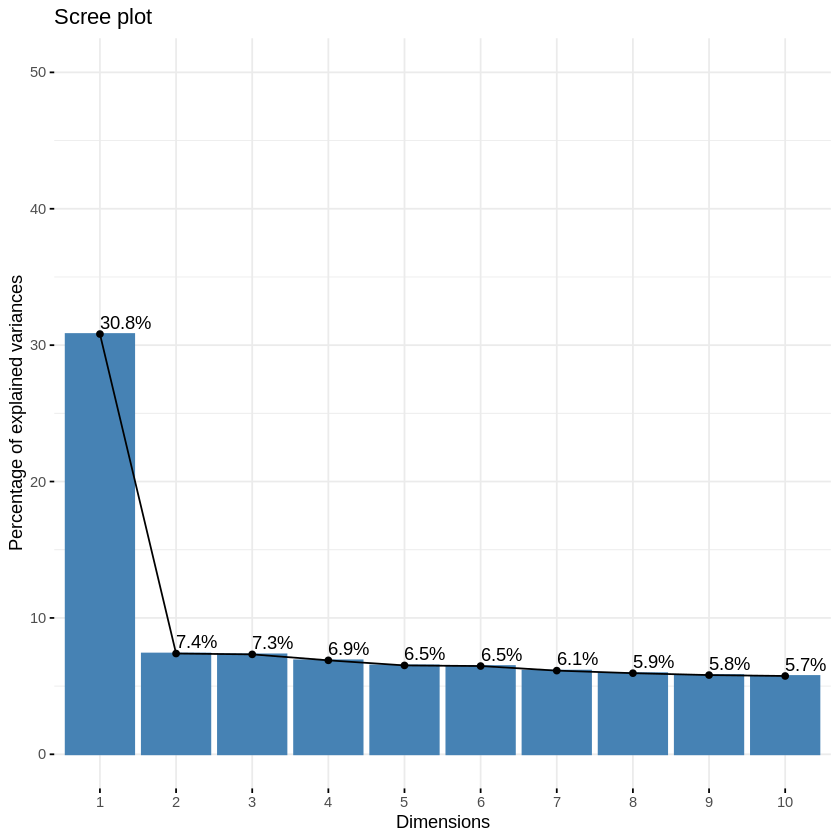

In [38]:
# extracting the most important features
library(factoextra)
library(FactoMineR)
res.pca <- PCA(df_normalized,  graph = FALSE)
# visualize eigenvalues/variances
fviz_screeplot(res.pca, addlabels = TRUE, ylim = c(0, 50))

As a result we obtain 10 principal components,each which explain a percentate of the total variation of the dataset
PC1 explains 30% of the total variance, 
PC2 explains 7.4 of the variance.

In [57]:
# install the farver package which eliminates the color decoding error.
install.packages("farver")
require(farver)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: farver



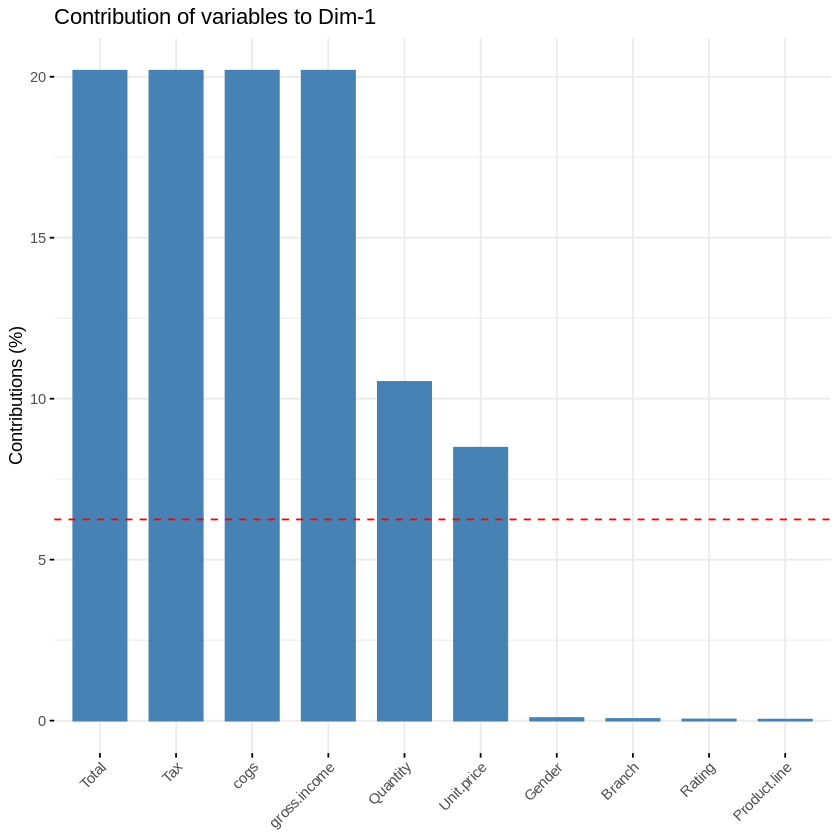

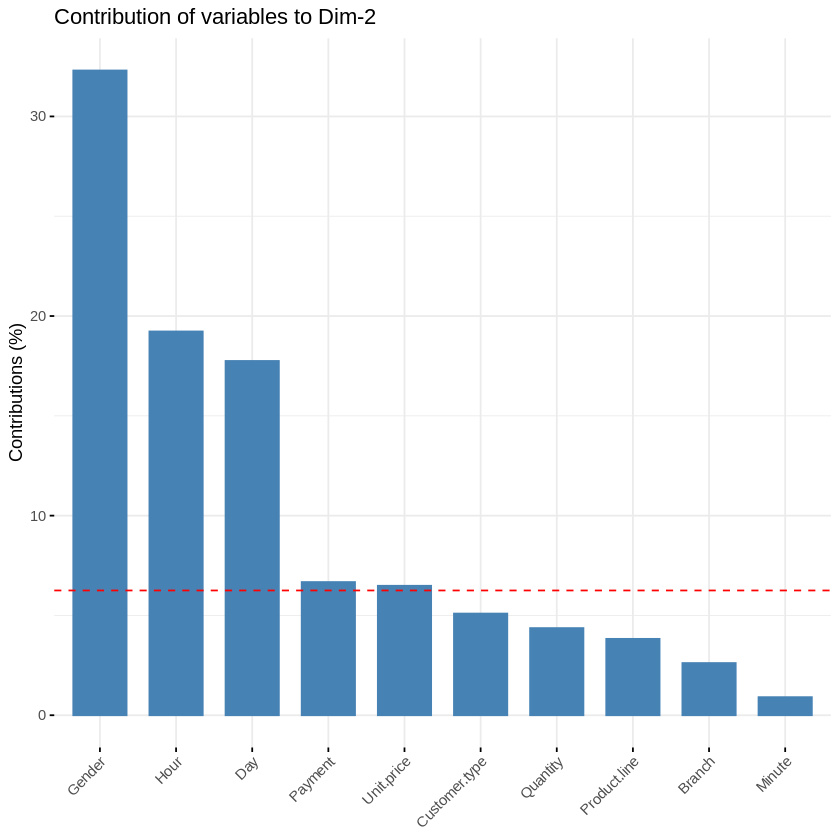

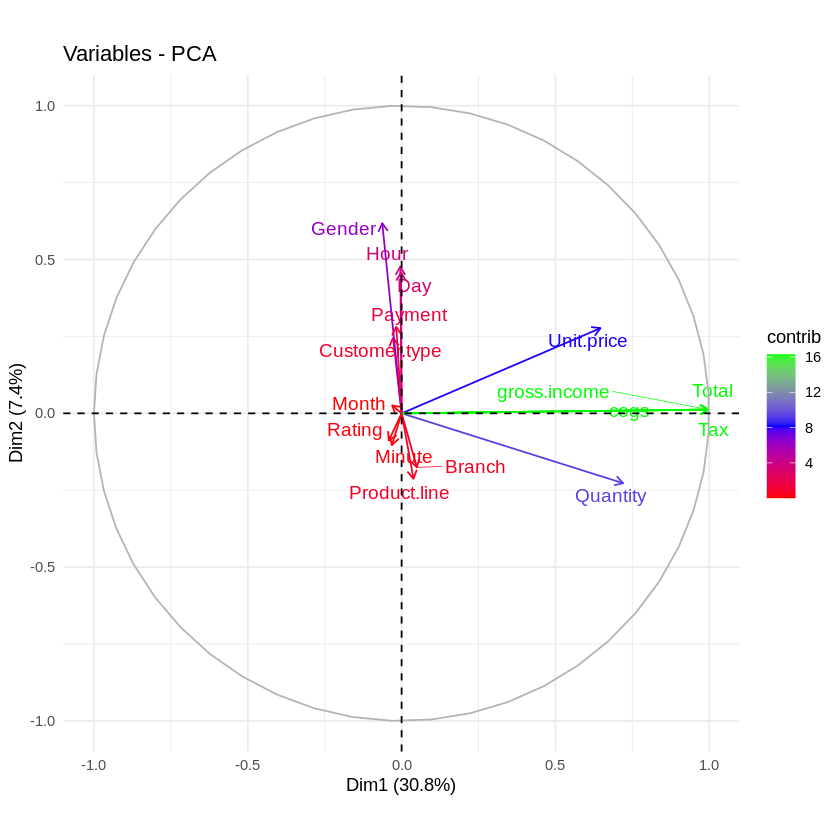

In [58]:
# Extract the results for variables
var <- get_pca_var(res.pca)# Contributions of variables to PC1
fviz_contrib(res.pca, choice = "var", axes = 1, top = 10)# Contributions of variables to PC2
fviz_contrib(res.pca, choice = "var", axes = 2, top = 10)# Control variable colors using their contributions to the principle axis
fviz_pca_var(res.pca, col.var="contrib",
             gradient.cols = c("red", "blue", "green"),
             repel = TRUE) + theme_minimal() + ggtitle("Variables - PCA")

# below we can see the 10 features with highest contribution

Gross income, total and tax seem have the highest contribution to highest number of sales.Month, branch, product line, rating, payment,Minutes,day have very low contribution highest number of sales.

In [40]:
# now carrying out PCA with center and scale set to true
df_normalized.pca <- prcomp(df_normalized, center = TRUE, scale. = TRUE)

# previewing our PCA summary
summary(df_normalized.pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.2205 1.0874 1.08282 1.05002 1.02123 1.01763 0.99088
Proportion of Variance 0.3081 0.0739 0.07328 0.06891 0.06518 0.06472 0.06136
Cumulative Proportion  0.3081 0.3821 0.45533 0.52424 0.58942 0.65414 0.71551
                          PC8    PC9    PC10    PC11    PC12   PC13      PC14
Standard deviation     0.9757 0.9641 0.95863 0.92025 0.90270 0.2994 3.316e-16
Proportion of Variance 0.0595 0.0581 0.05744 0.05293 0.05093 0.0056 0.000e+00
Cumulative Proportion  0.7750 0.8331 0.89054 0.94347 0.99440 1.0000 1.000e+00
                            PC15      PC16
Standard deviation     2.081e-16 1.172e-16
Proportion of Variance 0.000e+00 0.000e+00
Cumulative Proportion  1.000e+00 1.000e+00

In [41]:
str(df_normalized.pca)

List of 5
 $ sdev    : num [1:16] 2.22 1.09 1.08 1.05 1.02 ...
 $ rotation: num [1:16, 1:16] 0.0224 -0.0125 -0.0283 0.0174 0.2911 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:16] "Branch" "Customer.type" "Gender" "Product.line" ...
  .. ..$ : chr [1:16] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:16] 0.494 0.499 0.499 0.49 0.507 ...
  ..- attr(*, "names")= chr [1:16] "Branch" "Customer.type" "Gender" "Product.line" ...
 $ scale   : Named num [1:16] 0.409 0.5 0.5 0.343 0.295 ...
  ..- attr(*, "names")= chr [1:16] "Branch" "Customer.type" "Gender" "Product.line" ...
 $ x       : num [1:1000, 1:16] 2.05 -2.287 0.126 1.466 2.743 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:16] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In [42]:
install.packages("scales")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [43]:
# We will now plot our pca. This will provide us with some very useful insights i.e. 
# which cars are most similar to each other 
# ---
# 
install.packages("devtools",dependencies=TRUE)
# Installing our ggbiplot visualisation package
# 
library(devtools)
install_github("vqv/ggbiplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘brio’, ‘clisymbols’, ‘gargle’, ‘cyclocomp’, ‘xmlparsedata’, ‘downlit’, ‘ragg’, ‘parsedate’, ‘rappdirs’, ‘whoami’, ‘hunspell’, ‘usethis’, ‘covr’, ‘BiocManager’, ‘curl’, ‘foghorn’, ‘gmailr’, ‘lintr’, ‘mockery’, ‘pingr’, ‘pkgdown’, ‘rhub’, ‘spelling’


Skipping install of 'ggbiplot' from a github remote, the SHA1 (7325e880) has not changed since last install.
  Use `force = TRUE` to force installation



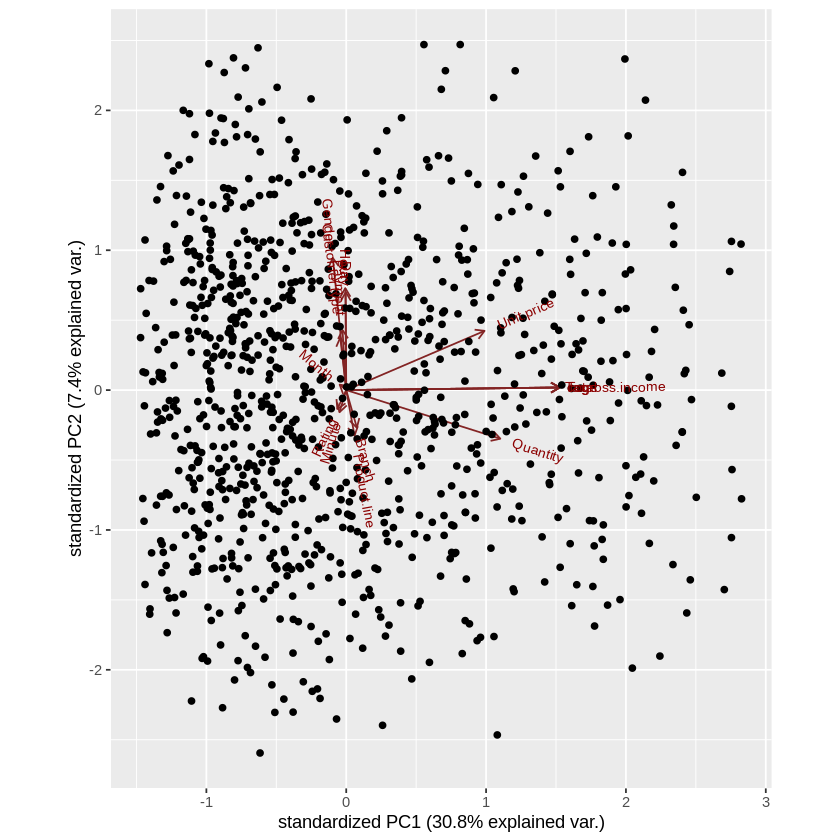

In [45]:
library(ggbiplot)

ggbiplot(df_normalized.pca)

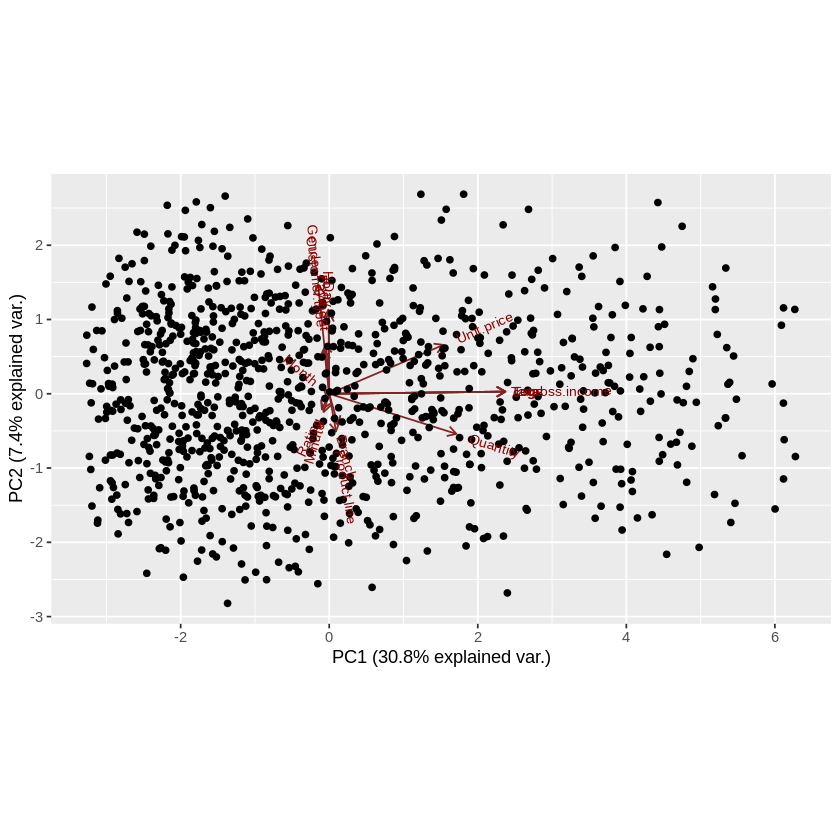

In [52]:
# Adding more detail to the plot, we provide arguments rownames as labels
# 
ggbiplot(df_normalized.pca, labels=rownames(df_normalized), obs.scale = 1, var.scale = 1)

###2.Dimension reduction using t-SNE algorithm

In [53]:
# loading Rtsne library
install.packages("Rtsne")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [54]:
library(Rtsne)


Performing PCA
Read the 1000 x 15 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.12 seconds (sparsity = 0.112168)!
Learning embedding...
Iteration 50: error is 69.666852 (50 iterations in 0.23 seconds)
Iteration 100: error is 64.664493 (50 iterations in 0.20 seconds)
Iteration 150: error is 64.445507 (50 iterations in 0.16 seconds)
Iteration 200: error is 64.392925 (50 iterations in 0.14 seconds)
Iteration 250: error is 64.377721 (50 iterations in 0.12 seconds)
Iteration 300: error is 1.764902 (50 iterations in 0.15 seconds)
Iteration 350: error is 1.574092 (50 iterations in 0.13 seconds)
Iteration 400: error is 1.510858 (50 iterations in 0.14 seconds)
Iteration 450: error is 1.482008 (50 iterations in 0.14 seconds)
Iteration 500: error is 1.464400 (50 iterations in 0.14 seconds)
Fitting performed in 1.54 seconds.


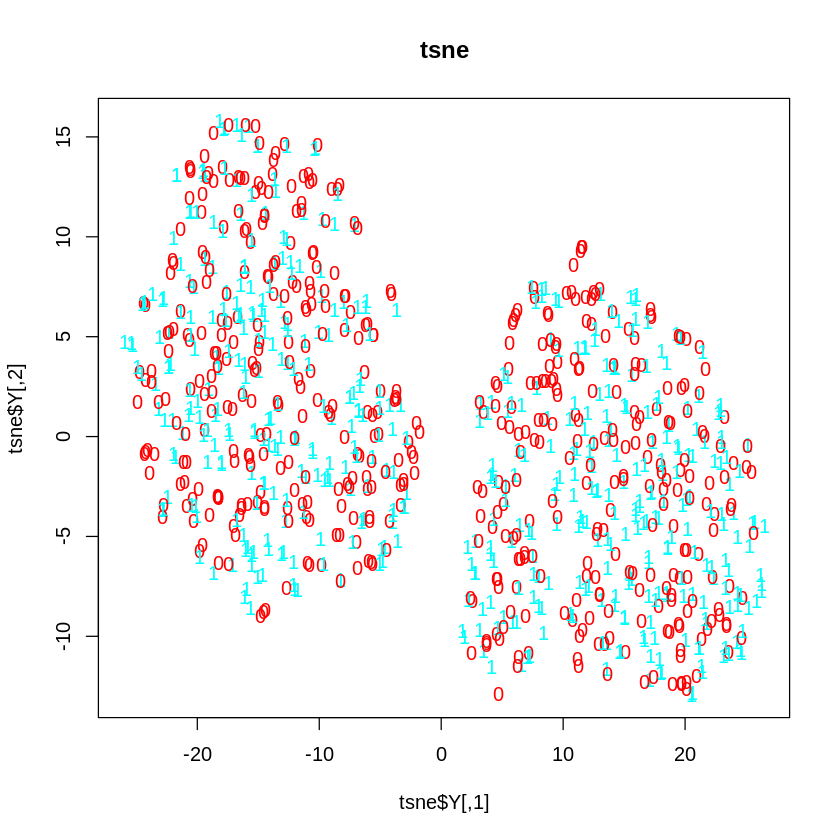

In [55]:
#Lets start with gender variable
# Curating the database for analysis 
df3<- df_normalized
df3$Gender <- as.factor(df3$Gender)

# for plotting
colors = rainbow(length(unique(df3$Gender)))
names(colors) = unique(df3$Gender)

# executing the algorithm on curated data
tsne <- Rtsne(df3$Gender[, -3], dims = 2, perplexity = 30, verbose = TRUE,
             max_iter = 500)

# plotting our graph
plot(tsne$Y, t = 'n', main = 'tsne')
text(tsne$Y, labels = df3$Gender,
col = colors[df3$Gender])


Performing PCA
Read the 1000 x 15 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.12 seconds (sparsity = 0.112224)!
Learning embedding...
Iteration 50: error is 70.839675 (50 iterations in 0.27 seconds)
Iteration 100: error is 64.766898 (50 iterations in 0.27 seconds)
Iteration 150: error is 64.437108 (50 iterations in 0.18 seconds)
Iteration 200: error is 64.367923 (50 iterations in 0.15 seconds)
Iteration 250: error is 64.347750 (50 iterations in 0.13 seconds)
Iteration 300: error is 1.775283 (50 iterations in 0.17 seconds)
Iteration 350: error is 1.583326 (50 iterations in 0.14 seconds)
Iteration 400: error is 1.517380 (50 iterations in 0.15 seconds)
Iteration 450: error is 1.489075 (50 iterations in 0.15 seconds)
Iteration 500: error is 1.473994 (50 iterations in 0.16 seconds)
Fitting performed in 1.77 seconds.


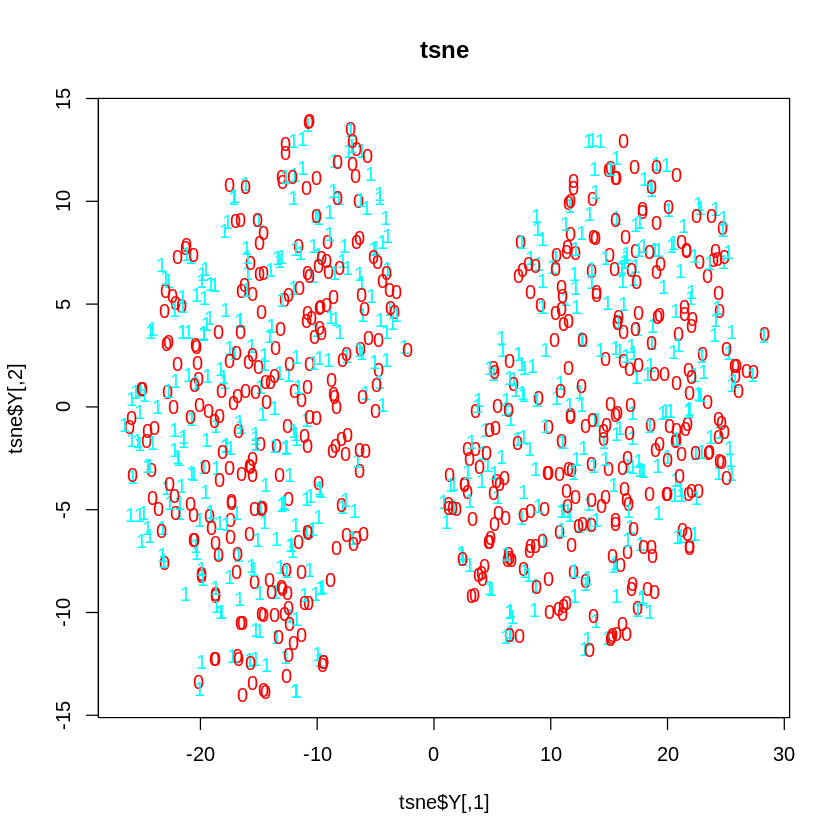

In [56]:
# Applying  t-SNE algorithm to the Customer.type 

df4 <- df_normalized
df4$Customer.type <- as.factor(df4$Customer.type)

# for plotting
colors = rainbow(length(unique(df4$Customer.type)))
names(colors) = unique(df4$Customer.type)

# executing the algorithm on curated data
tsne <- Rtsne(df4[, -2], dims = 2, perplexity = 30, verbose = TRUE,
             max_iter = 500)

# Plotting our graph and closely examining the graph
plot(tsne$Y, t = 'n', main = 'tsne')
text(tsne$Y, labels = df4$Customer.type,
col = colors[df4$Customer.type])

Performing PCA
Read the 1000 x 17 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.12 seconds (sparsity = 0.108040)!
Learning embedding...
Iteration 50: error is 63.769758 (50 iterations in 0.22 seconds)
Iteration 100: error is 59.391500 (50 iterations in 0.16 seconds)
Iteration 150: error is 58.550551 (50 iterations in 0.14 seconds)
Iteration 200: error is 57.792310 (50 iterations in 0.14 seconds)
Iteration 250: error is 57.318202 (50 iterations in 0.13 seconds)
Iteration 300: error is 1.209344 (50 iterations in 0.12 seconds)
Iteration 350: error is 1.030395 (50 iterations in 0.12 seconds)
Iteration 400: error is 0.971156 (50 iterations in 0.12 seconds)
Iteration 450: error is 0.952822 (50 iterations in 0.12 seconds)
Iteration 500: error is 0.941224 (50 iterations in 0.12 seconds)
Fitting performed in 1.38 seconds.


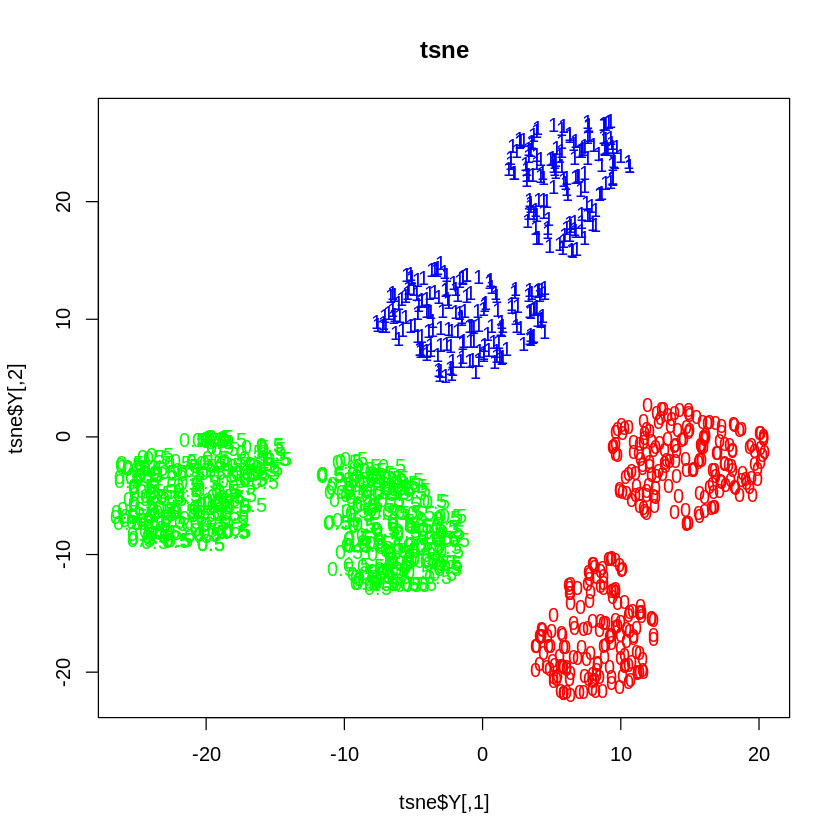

In [61]:
# Applying  t-SNE algorithm to branch column

df5 <- df_normalized
df5$Branch <- as.factor(df5$Branch)

# for plotting
colors = rainbow(length(unique(df5$Branch)))
names(colors) = unique(df5$Branch)

# executing the algorithm on curated data
tsne <- Rtsne(df5[, -2], dims = 2, perplexity = 30, verbose = TRUE,
             max_iter = 500)

# plotting our graph
plot(tsne$Y, t = 'n', main = 'tsne')
text(tsne$Y, labels = df5$Branch,
col = colors[df5$Branch])

Performing PCA
Read the 1000 x 17 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.13 seconds (sparsity = 0.108324)!
Learning embedding...
Iteration 50: error is 63.190474 (50 iterations in 0.17 seconds)
Iteration 100: error is 59.607258 (50 iterations in 0.15 seconds)
Iteration 150: error is 58.149736 (50 iterations in 0.14 seconds)
Iteration 200: error is 57.741817 (50 iterations in 0.14 seconds)
Iteration 250: error is 57.507637 (50 iterations in 0.14 seconds)
Iteration 300: error is 1.208118 (50 iterations in 0.12 seconds)
Iteration 350: error is 1.031304 (50 iterations in 0.12 seconds)
Iteration 400: error is 0.973911 (50 iterations in 0.12 seconds)
Iteration 450: error is 0.951844 (50 iterations in 0.12 seconds)
Iteration 500: error is 0.936405 (50 iterations in 0.12 seconds)
Fitting performed in 1.33 seconds.


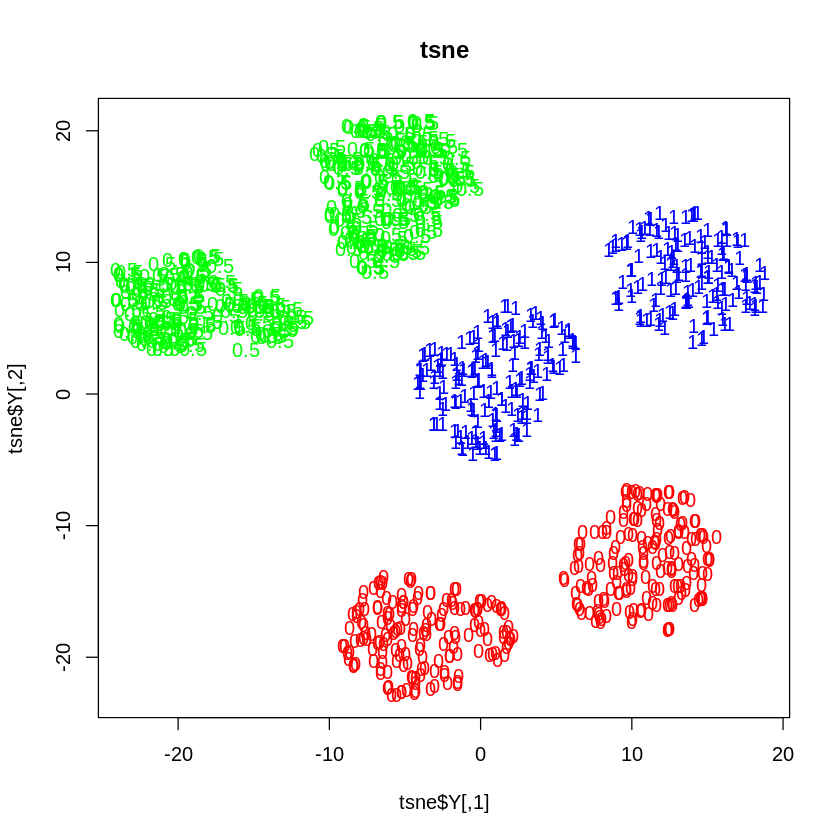

In [62]:
## Applying  t-SNE algorithm to the Payment column
# Curating the database for analysis 
df6<- df_normalized
df6$Payment <- as.factor(df6$Payment)

# for plotting
colors = rainbow(length(unique(df6$Payment)))
names(colors) = unique(df6$Payment)

# executing the algorithm on curated data
tsne <- Rtsne(df6[, -3], dims = 2, perplexity = 30, verbose = TRUE,
             max_iter = 500)

# plotting our graph and closely examining the graph
plot(tsne$Y, t = 'n', main = 'tsne')
text(tsne$Y, labels = df6$Payment,
col = colors[df6$Payment])


We can see from the  t-SNE plot and displays clusters and this clusters have been strongly by the chosen parameterization.

Performing PCA
Read the 1000 x 20 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.12 seconds (sparsity = 0.104972)!
Learning embedding...
Iteration 50: error is 68.532787 (50 iterations in 0.17 seconds)
Iteration 100: error is 56.038075 (50 iterations in 0.13 seconds)
Iteration 150: error is 54.363134 (50 iterations in 0.13 seconds)
Iteration 200: error is 54.055444 (50 iterations in 0.13 seconds)
Iteration 250: error is 53.921531 (50 iterations in 0.13 seconds)
Iteration 300: error is 1.067781 (50 iterations in 0.12 seconds)
Iteration 350: error is 0.862945 (50 iterations in 0.12 seconds)
Iteration 400: error is 0.809016 (50 iterations in 0.12 seconds)
Iteration 450: error is 0.792666 (50 iterations in 0.12 seconds)
Iteration 500: error is 0.781499 (50 iterations in 0.12 seconds)
Fitting performed in 1.30 seconds.


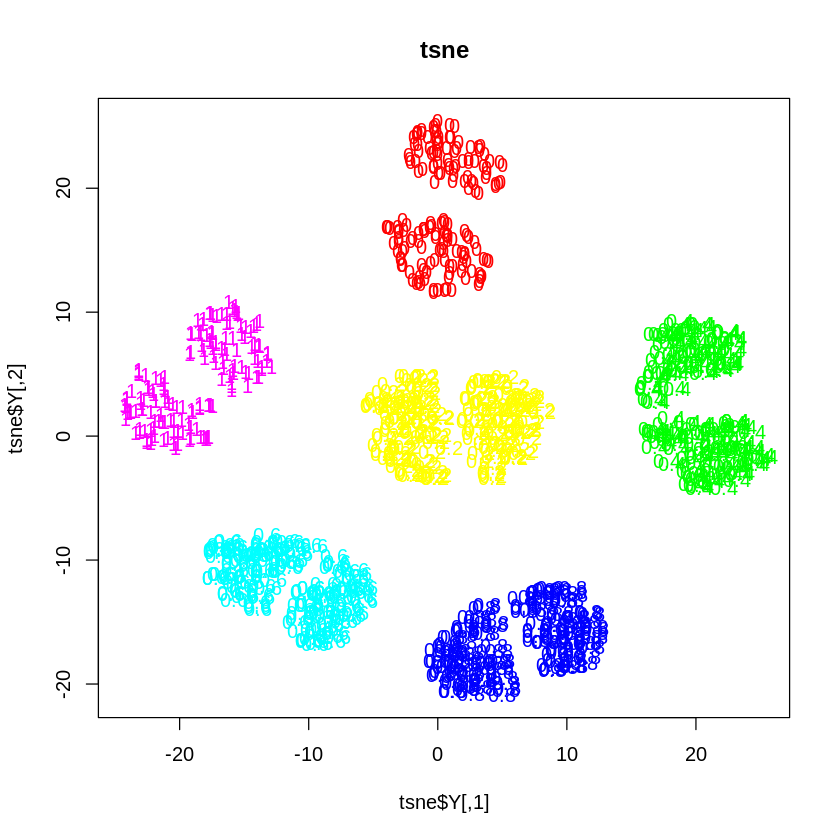

In [63]:
## Applying  t-SNE algorithm to the Product line column

df7<- df_normalized
df7$Product.line <- as.factor(df7$Product.line)

# for plotting
colors = rainbow(length(unique(df7$Product.line)))
names(colors) = unique(df7$Product.line)

# executing the algorithm on curated data
tsne <- Rtsne(df7[, -3], dims = 2, perplexity = 30, verbose = TRUE,
             max_iter = 500)

# plotting our graph and closely examining the graph
plot(tsne$Y, t = 'n', main = 'tsne')
text(tsne$Y, labels = df7$Product.line,
col = colors[df7$Product.line])

In t-SNE  algorithm points tend to be closer to one another as shown in the  plot.We can see that points are closely related are the same color.There are 6 clusters representing 

1.Electronic accessories

2.Fashion accessories 

3.Food and beverages 

4.Health and beauty 

5.Home and lifestyle

6.Sports and travel

#Part 2:Feature selection

###1.Filter Method

In [33]:
suppressWarnings(
        suppressMessages(if
                         (!require(caret, quietly=TRUE))
                install.packages("caret")))
library(caret)
library(corrplot)

In [35]:
#Lets get the correlation.
correlationMatrix <- cor(df)

In [36]:
# Find attributes that are highly correlated
# ---
#
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.75)

# Highly correlated attributes
# ---
# 
highlyCorrelated

names(df[,highlyCorrelated])

[1]  9 12  7

[1] "cogs"  "Total" "Tax"

These are the highly correlated features with a correlation of 0.75  or more.

In [37]:
# We can remove the variables with a higher correlation 
# and comparing the results graphically as shown below
# ---
# 
# Removing Redundant Features 
# ---
# 
df2<-df[-highlyCorrelated]

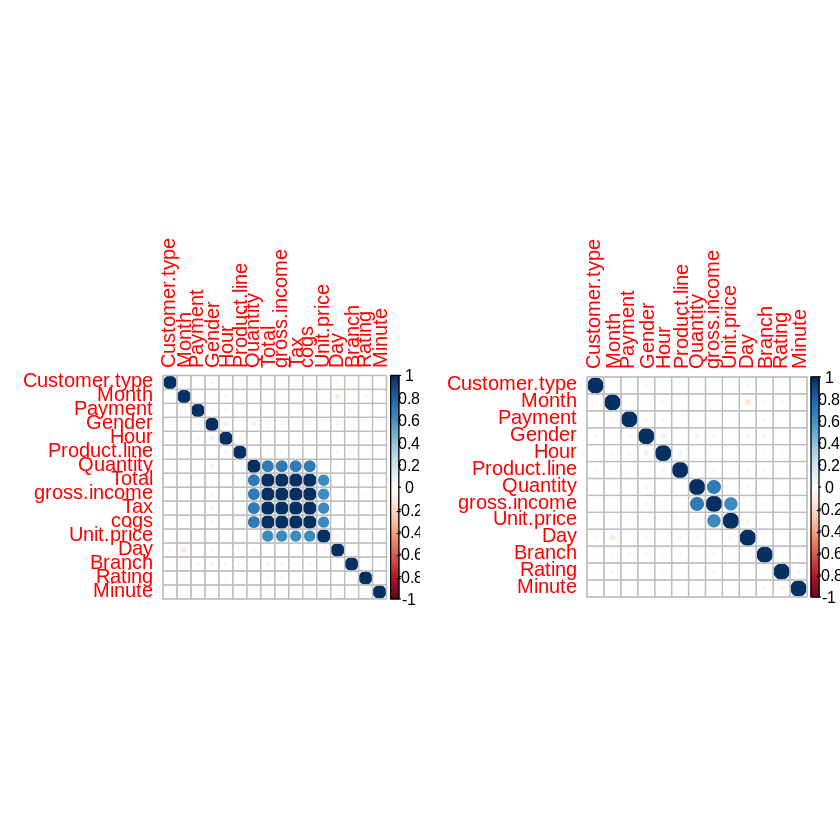

In [38]:
# Performing our graphical comparison
# ---
# 
par(mfrow = c(1, 2))
corrplot(correlationMatrix, order = "hclust")
corrplot(cor(df2), order = "hclust")

From the plot we can see that We can use the find Correlation function has
  removed redundancy by correlation using the given dataset. 
It has searched through a correlation matrix and return a vector of integers corresponding to the columns, to remove or reduce pair-wise correlations.


###2.Wrapper Method

In [41]:
#Lets first import mclust.

suppressWarnings(
        suppressMessages(if
                         (!require(mclust, quietly=TRUE))
                install.packages("mclust")))
                         
library(mclust)

In [42]:
#Here we use the clustvarsel package that contains an implementation of wrapper methods. 
# The clustvarsel function will implement variable section methodology 
# for model-based clustering to find the optimal subset of variables in a dataset.
suppressWarnings(
        suppressMessages(if
                         (!require(clustvarsel, quietly=TRUE))
                install.packages("clustvarsel")))
                         
library(clustvarsel)

In [53]:
# Sequential forward greedy search (default)
# ---
#
out = clustvarsel(df, G = 1:16)
out



------------------------------------------------------ 
Variable selection for Gaussian model-based clustering
Stepwise (forward/backward) greedy search
------------------------------------------------------ 

 Variable proposed Type of step  BICclust Model  G   BICdiff Decision
              Hour          Add -4267.096     E 10  901.6667 Accepted
            Branch          Add -6237.760   VEV  4  477.3458 Accepted
           Payment          Add -9080.345   VEI  5 -363.4086 Rejected
            Branch       Remove -4267.096     E 10  477.3458 Rejected

Selected subset: Hour, Branch

The selection algorithm has indicated that the subset 
we use for the clustering model is composed of hour and branch variables
and that other variables should be rejected. 
Having identified the variables that we use, we proceed to build the clustering model

In [55]:
Subset1 = df[,out$subset]
mod = Mclust(Subset1, G = 1:16)
summary(mod)


---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 4 components: 

 log-likelihood    n df      BIC       ICL
      -3049.802 1000 20 -6237.76 -6297.175

Clustering table:
  1   2   3   4 
137 327 203 333 

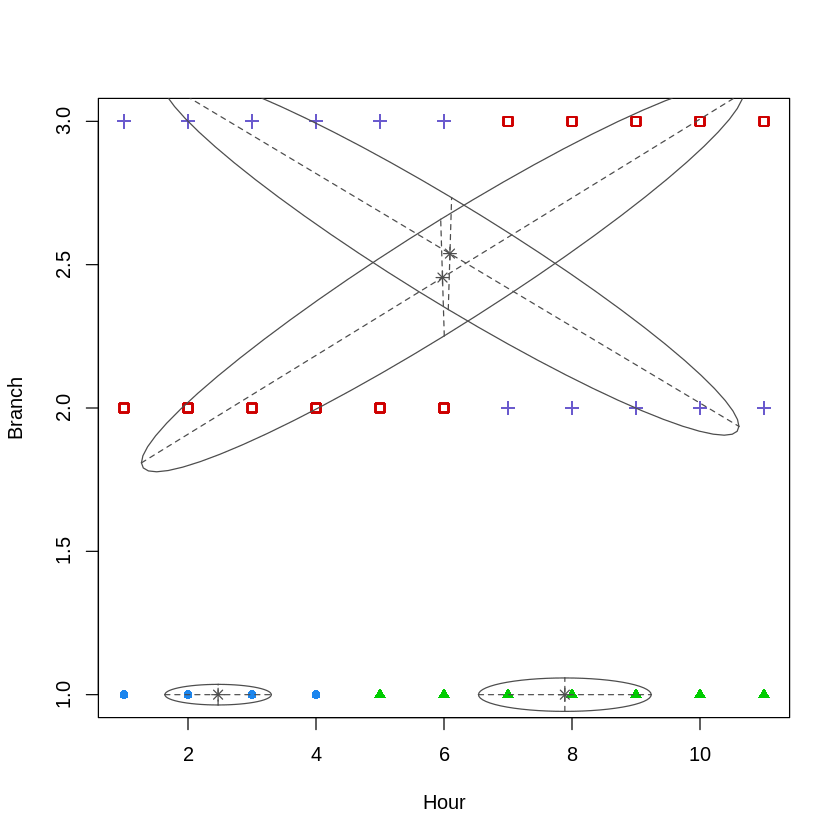

In [56]:
plot(mod,c("classification"))

##Feature ranking

In [74]:
#Feature Ranking
# We will use the FSelector Package.

suppressWarnings(
        suppressMessages(if
                         (!require(FSelector, quietly=TRUE))
                install.packages("FSelector")))
library(FSelector)

In [76]:
# From the FSelector package, we use the correlation coefficient as a unit of valuation. 
# This would be one of the several algorithms contained 
# in the FSelector package that can be used rank the variables.

Scores <- linear.correlation(df_normalized)
Scores

,attr_importance
,<dbl>
Customer.type,0.01960787
Gender,0.05631756
Product.line,0.05393756
Unit.price,0.02820244
Quantity,0.01596379
Tax,0.04104666
Payment,0.05010429
cogs,0.04104666
gross.income,0.04104666


In [78]:
# From the output above, we observe a list containing 
# rows of variables on the left and score on the right. 
# In order to make a decision, we define a cutoff 
# i.e. suppose we want to use the top 5 representative variables, 
# through the use of the cutoff.k function included in the FSelector package. 
# Alternatively, we could define our cutoff visually 
# but in cases where there are few variables than in high dimensional datasets.
# 
# cutoff.k: The algorithms select a subset from a ranked attributes. 
# ---
#
Subset <- cutoff.k(Scores, 5)
as.data.frame(Subset)

Subset
<fct>
Gender
Product.line
Payment
cogs
Tax


In [79]:
# We could also set cutoff as a percentage which would indicate 
# that we would want to work with the percentage of the best variables.
# ---
#
Subset2 <-cutoff.k.percent(Scores, 0.4)
as.data.frame(Subset2)

Subset2
<fct>
Gender
Product.line
Payment
cogs
Tax
gross.income


In [81]:
# Instead of using the scores for the correlation coefficient, 
# we can use an entropy - based approach as shown below;
# ---
# 
Scores2 <- information.gain(df_normalized)

# Choosing Variables by cutoffSubset <- cutoff.k(Scores2, 5)
# ---
# 
Subset3 <- cutoff.k(Scores2, 5)
as.data.frame(Subset3)


Subset3
<fct>
Customer.type
Gender
Product.line
Unit.price
Quantity


#Conclusion

Although i have done both PCA and t-SNE algorithm, in dimension reduction techniques, the best that works with data that has high colinearity between variables is the Principal component analysis.From PCA we have identified 6 variables that have the highest contribution to highest total sales: 

1.Total

2.COGS

3.Gross income

4.Tax

5.Quantity

6.Unit price